## 自定义坐标轴刻度

Matplotlib默认坐标轴定位器(locator) 与 格式生成器(formatter)  



### 主刻度与次要刻度


In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np

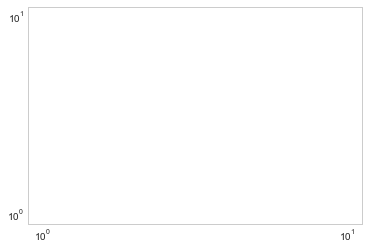

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

可以通过坐标轴的`formatter与locator`对象，自定义刻度属性

In [6]:
# 查看x轴的locator对象
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

# 查看x轴的formatter对象
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### 隐藏刻度与标签
+ plt.NullLocator(): 隐藏刻度
+ plt.NullFormatter(): 隐藏标签

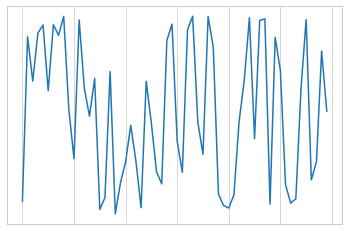

In [12]:
ax  = plt.axes()
ax.plot(np.random.rand(60))

# 隐藏y轴主刻度，标签也自然被隐藏
ax.yaxis.set_major_locator(plt.NullLocator())
# 隐藏x轴主标签, 保留刻度
ax.xaxis.set_major_formatter(plt.NullFormatter())

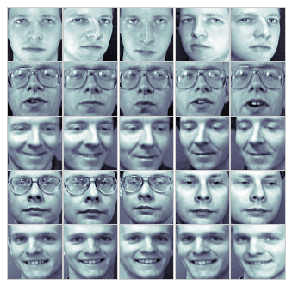

In [15]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# 从scikit-learn获取一些人脸照片数据
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i + j], cmap='bone')

### 增减刻度数量

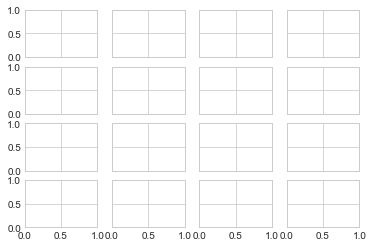

In [16]:
fig, ax = plt.subplots(4,4,sharex=True, sharey=True)

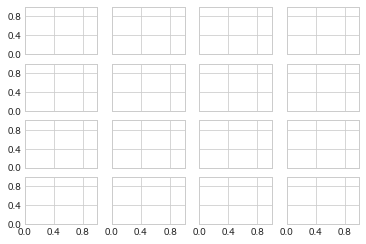

In [18]:
# 为每个坐标轴设置主要刻度定位器
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))    
    
fig

### 设置刻度格式

(0, 9.42477796076938)

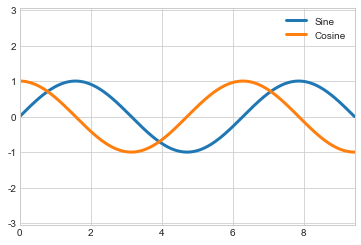

In [20]:
# 画正弦曲线和余弦曲线
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# 设置网格、 图例和坐标轴上下限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')

ax.set_xlim(0, 3*np.pi)

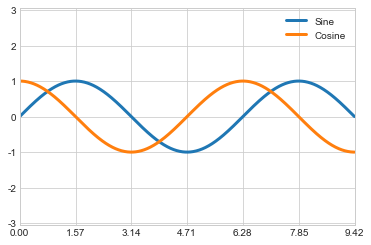

In [27]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))

fig

根据函数修改坐标轴刻度

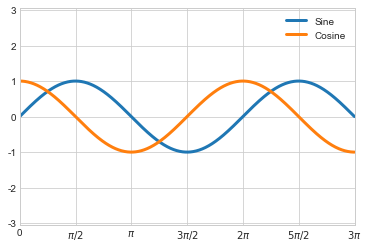

In [38]:
def format_func(value, tick_number):
    # 找到Π/2的倍数刻度
    N = int(np.round(value / (np.pi / 2)))
    if N == 0:
        return '0'
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N %2 > 0 :
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig